__header__ b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 25 15:38:38 2024'
__version__ 1.0
__globals__ []
asdf [[array([[1.63000e+02, 1.72000e+02, 1.76000e+02, ..., 2.99126e+05,
          2.99156e+05, 2.99907e+05]])                             ]
 [array([[8.90000e+01, 9.20000e+01, 1.77000e+02, ..., 2.99089e+05,
          2.99107e+05, 2.99170e+05]])                             ]
 [array([[1.66000e+02, 8.27000e+02, 1.18600e+03, 2.53200e+03, 3.04700e+03,
          4.44200e+03, 4.79800e+03, 5.06400e+03, 5.31400e+03, 5.99800e+03,
          6.36000e+03, 6.60800e+03, 6.90300e+03, 7.84000e+03, 8.07300e+03,
          8.52100e+03, 8.83900e+03, 9.40100e+03, 1.01650e+04, 1.06380e+04,
          1.07340e+04, 1.07470e+04, 1.08450e+04, 1.08470e+04, 1.08500e+04,
          1.08540e+04, 1.08560e+04, 1.08630e+04, 1.08710e+04, 1.08730e+04,
          1.08770e+04, 1.08810e+04, 1.08860e+04, 1.08880e+04, 1.08920e+04,
          1.08970e+04, 1.09020e+04, 1.09080e+04, 1.09100e+04, 1.09120e+04,
   

C:\Users\getsum\AppData\Local\Temp\ipykernel_60736\3606701094.py:34: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p)


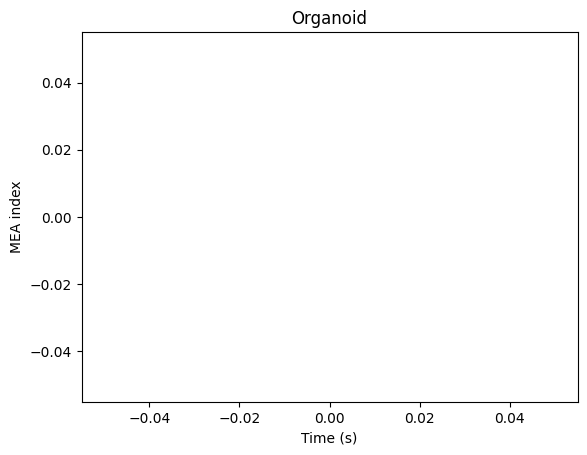

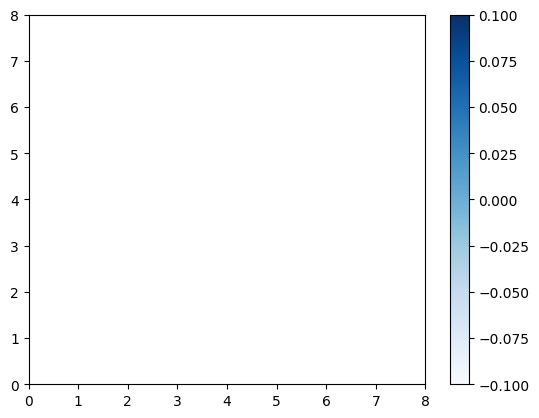

In [9]:
import numpy as np
import brainpy as bp
import brainpy.math as bm
from scipy import stats
import matplotlib.pyplot as plt
import scipy.io as scio
import os

path = "../data/new_data/stim1.2-1.mat"
record = scio.loadmat(path)

dt = bm.get_dt()
steps = int(1 / bm.get_dt())
cutTime = steps * 500
shape = (8,8)

spikes = np.zeros((cutTime, np.prod(shape)))

for key, val in record.items():
    print(key, val)
    if key[-2:] != "nr": continue
    if key[11:13].isdigit() == False:  continue 
    data = np.array(val)
    pos = int(key[11:13]) #AnSt_Label_
    pos = (pos // 10 - 1) * 8 + pos % 10 - 1

    # data = np.array(val)
    # pos = int(key[19:21]) #AnSt_Label_E_00159_
    # pos = (pos // 10 - 1) * 8 + pos % 10 - 1
    data = np.unique(np.round(data / dt)).astype(np.int32)
    spikes[data[data <= cutTime], pos] = 1

p = np.sum(spikes, axis=0)
p = p / np.sum(p)
p = p.reshape(shape)
bp.visualize.raster_plot(bm.arange(cutTime), spikes, show=False, xlabel='Time (s)', ylabel="MEA index", title='Organoid')
plt.show()
#bp.visualize.raster_plot(bm.arange(cutTime), spikes, show=True)
    
plt.pcolormesh(p.reshape(shape).T, cmap="Blues")
plt.colorbar()
plt.show()

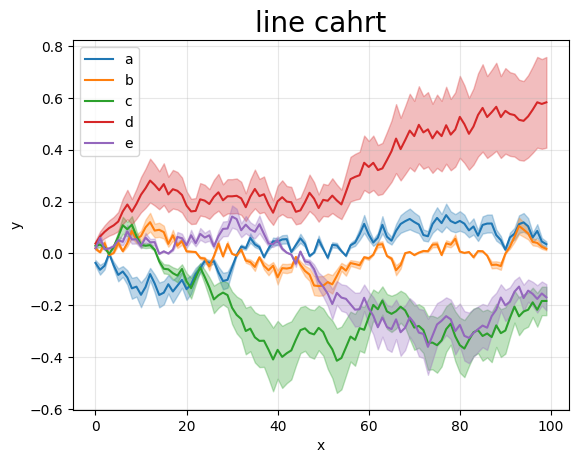

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(9615)

# generate df
N = 100
df = pd.DataFrame((.1 * (np.random.random((N, 5)) - .5)).cumsum(0),
                  columns=['a', 'b', 'c', 'd', 'e'],)

# plot line + confidence interval
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

for key, val in df.items():
    l, = ax.plot(val.index, val.values, label=key)
    ax.fill_between(val.index,
                    val.values * .7, val.values * 1.3,
                    color=l.get_color(), alpha=.3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('line cahrt', size=20)

legend = ax.legend(loc='best')
plt.show()